<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 2
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

15:19:21 INFO << load arm CSV.
15:19:21 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 2, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 2, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:43<00:00, 14.66s/it]


15:28:02 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:28:02 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


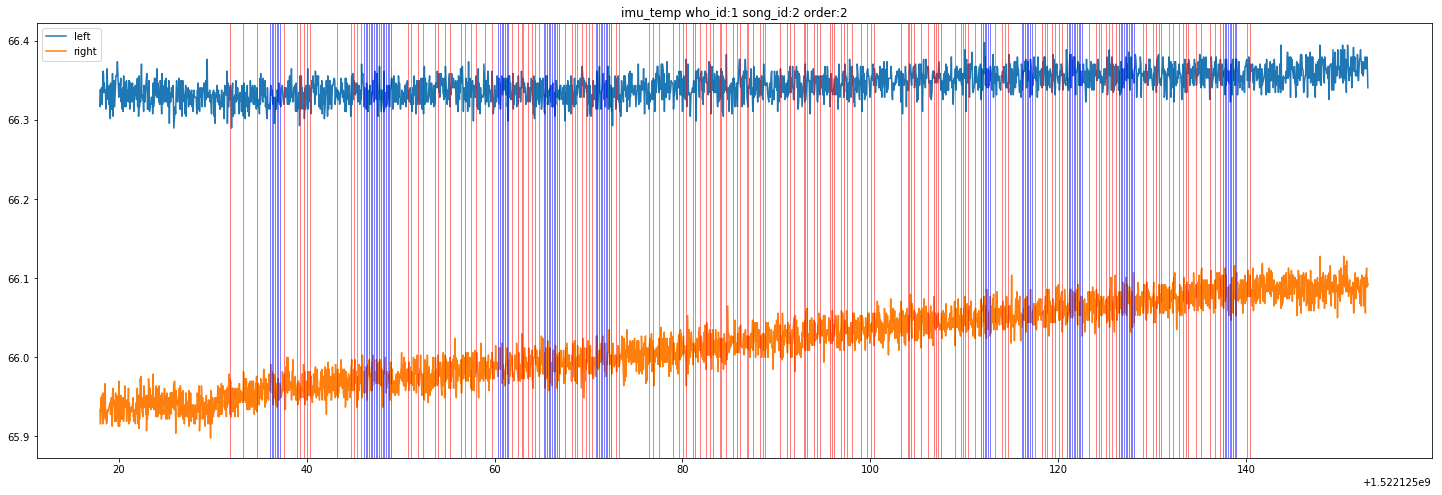

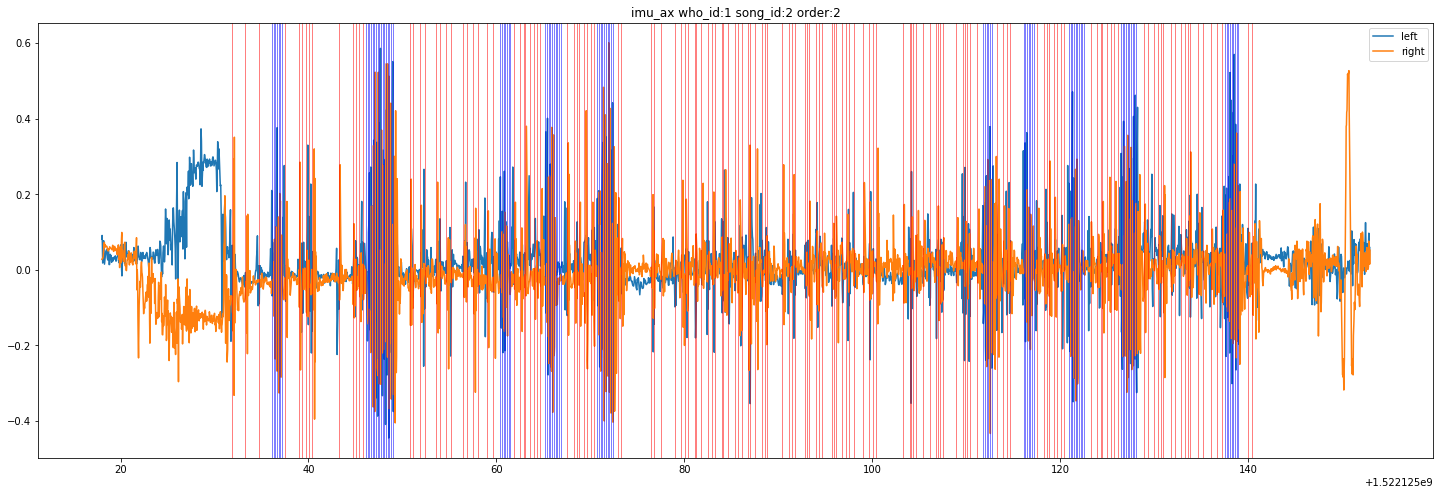

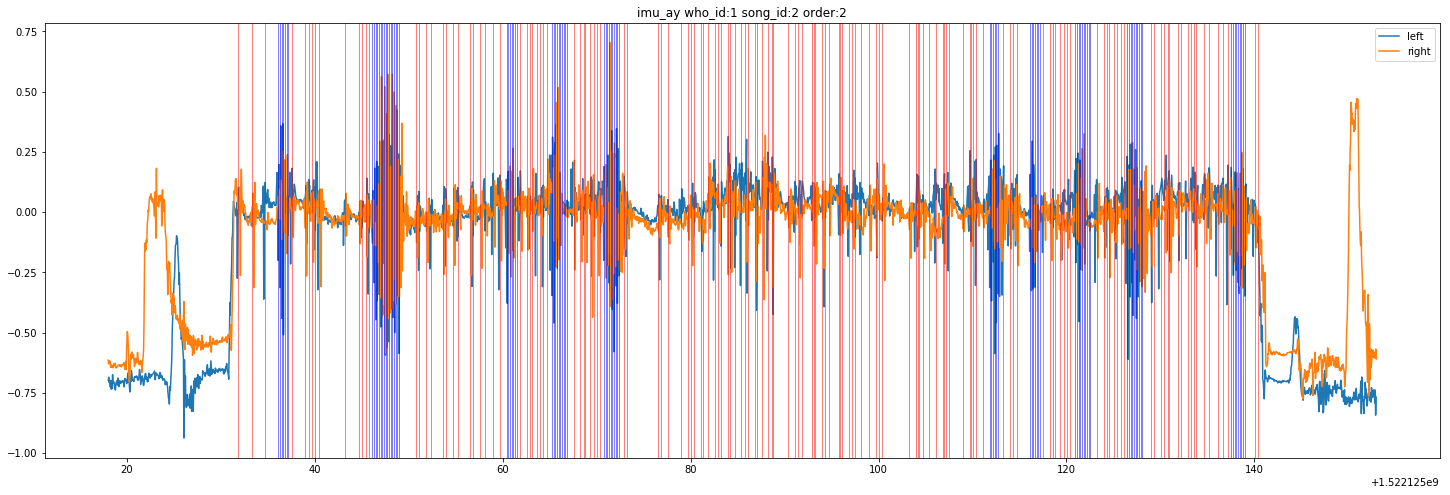

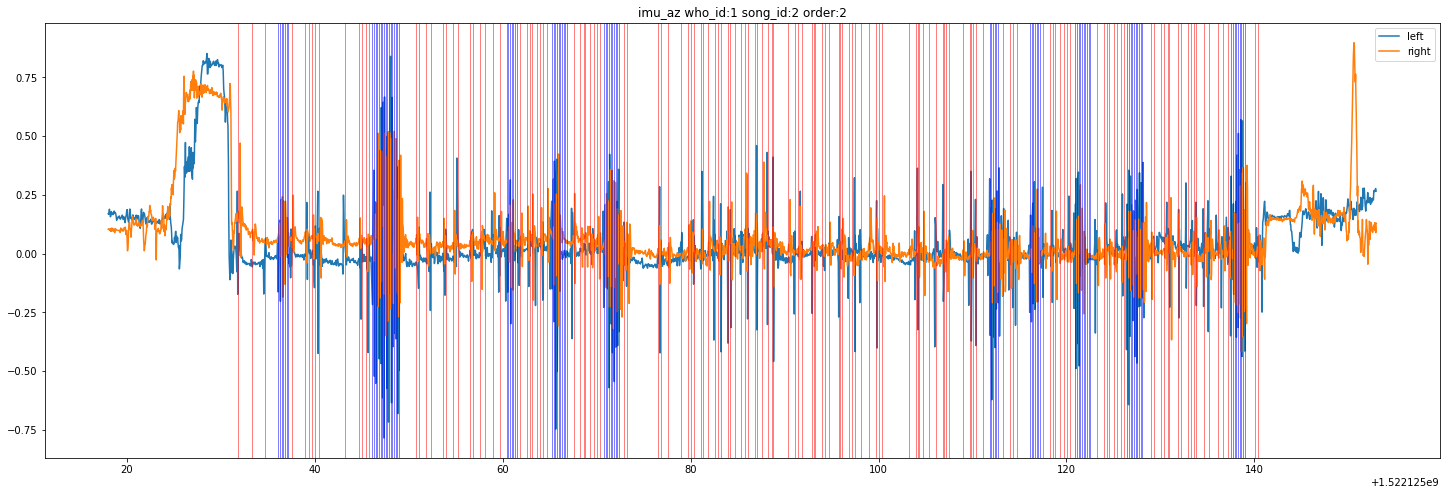

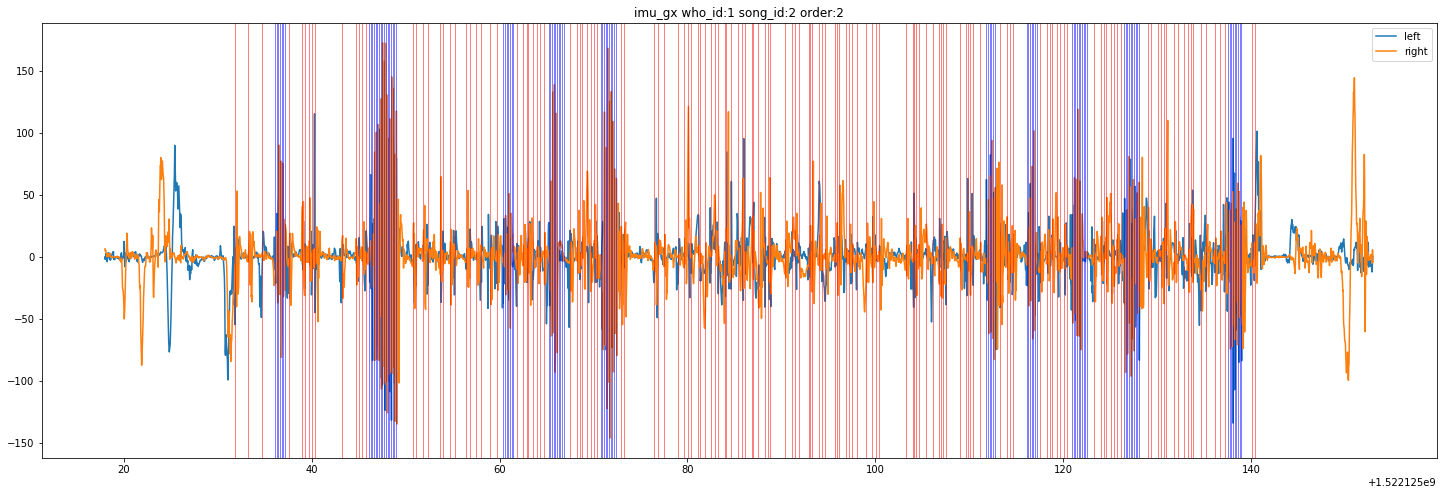

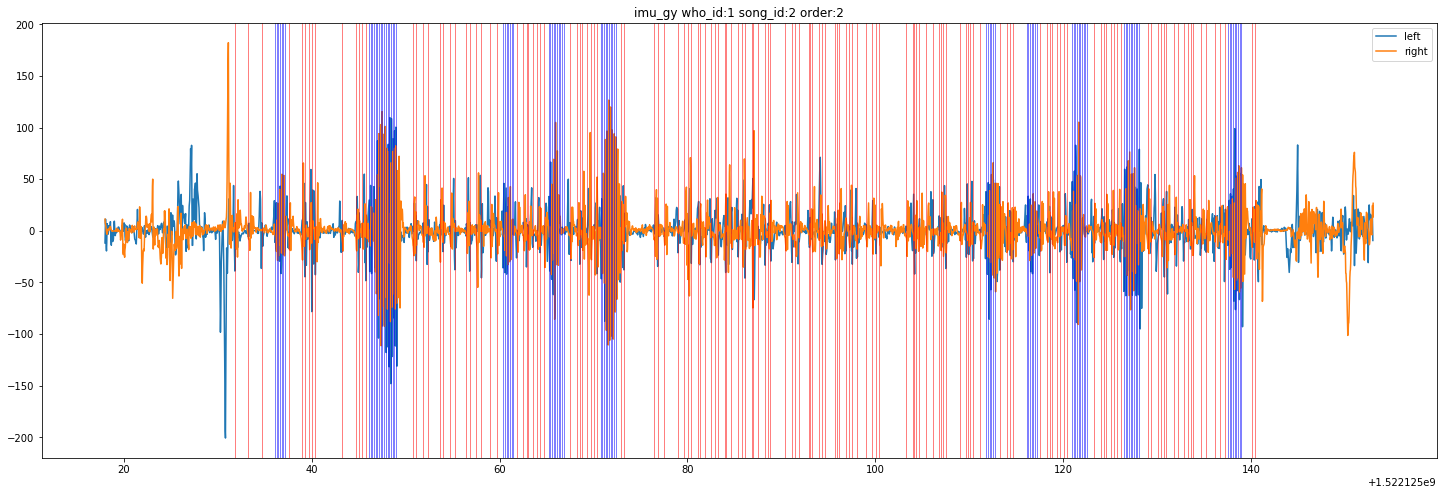

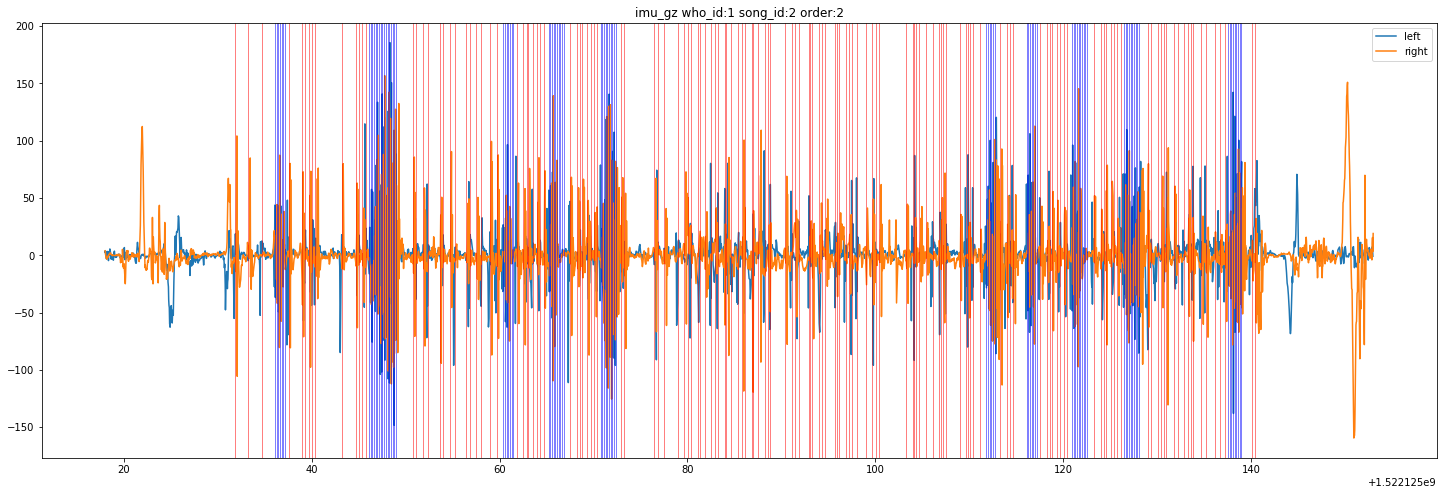

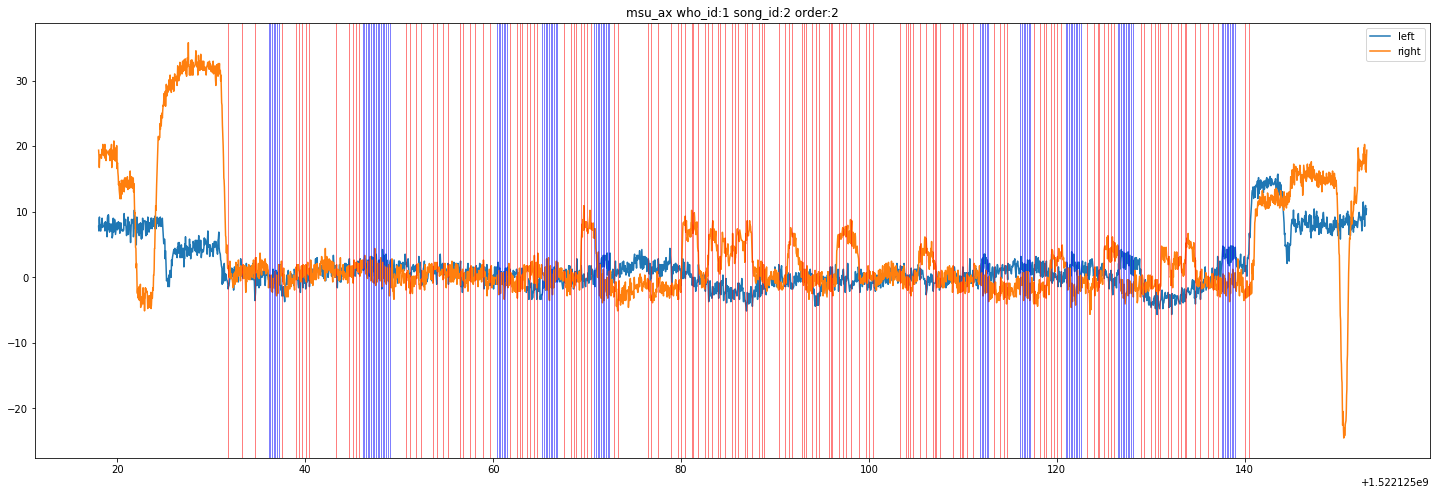

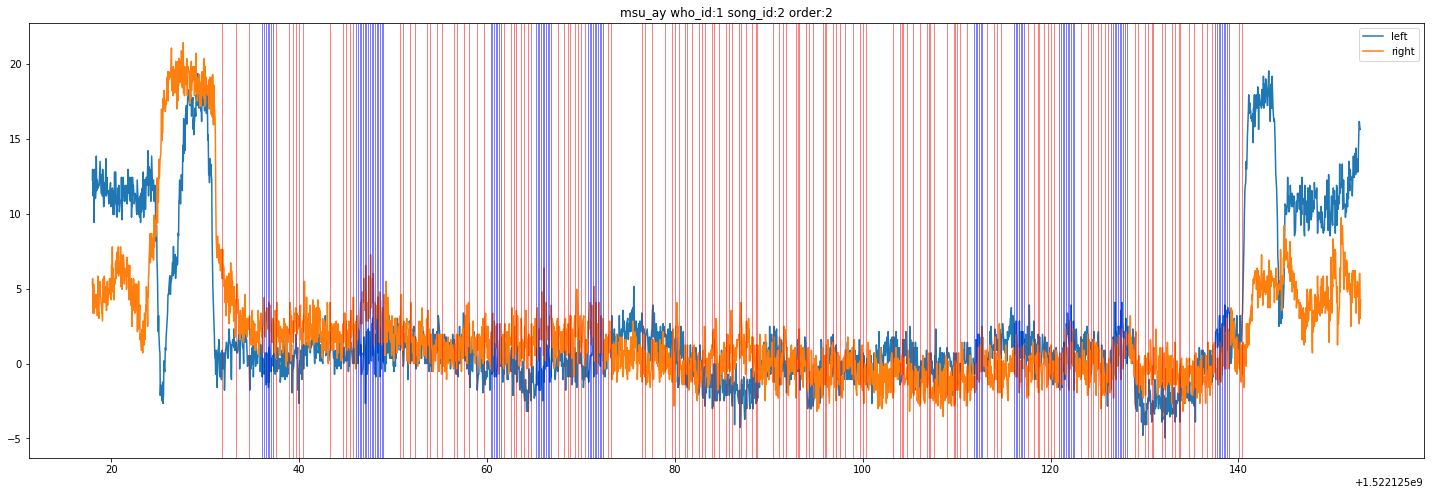

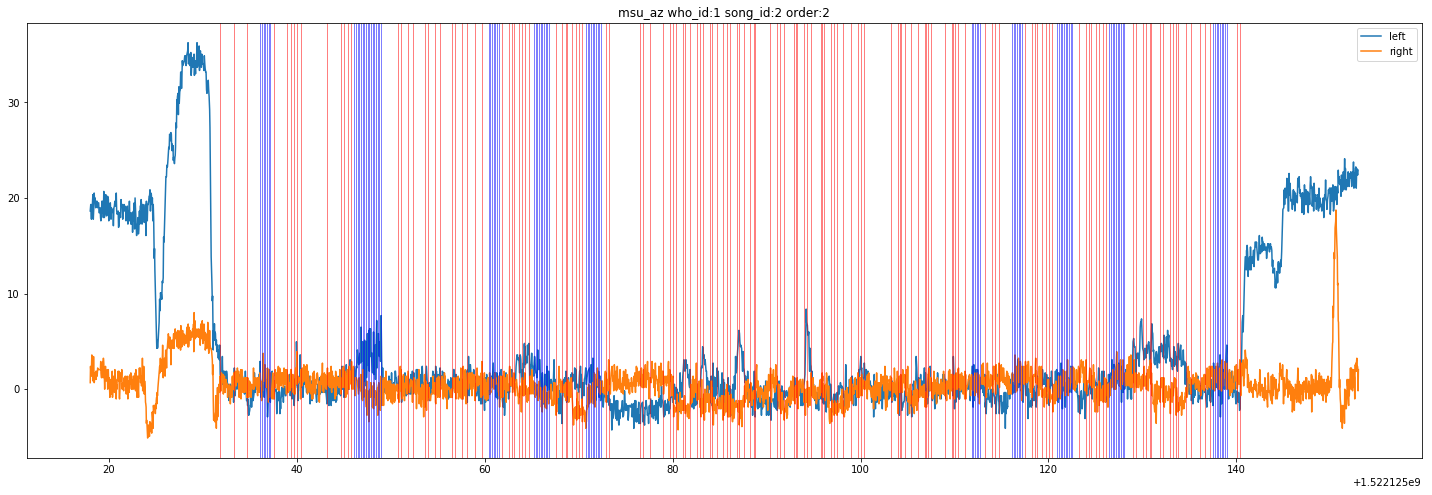

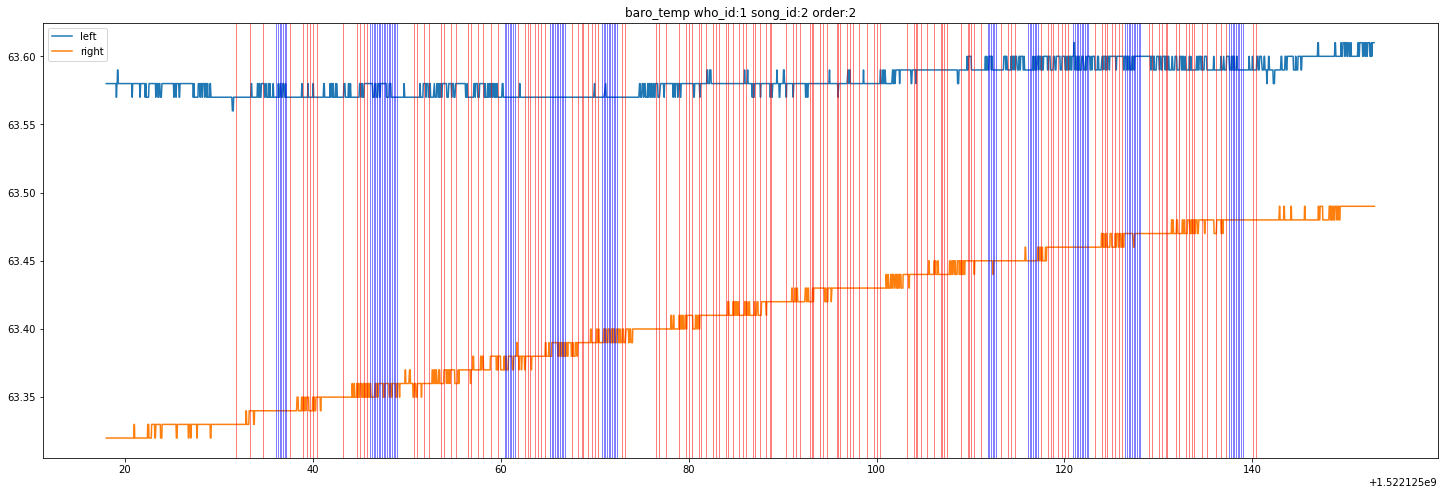

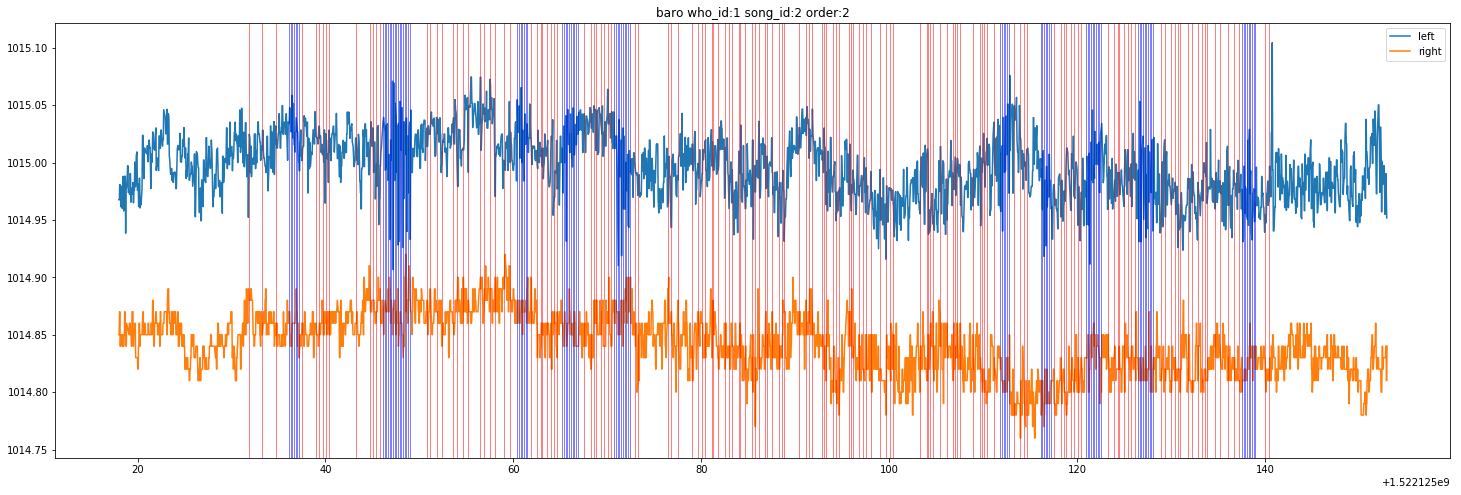

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.728760,0.000179,0.927700,9.274675,30.653759,11.890300,0.531269,116.673364,0.727767,10.035439,...,0.272727,0.272727,0.272727,0.090909,-0.822050,0.520217,-0.486658,0.921069,0.916820,0.800997
1,0.731938,0.000267,0.925143,7.590872,13.502731,10.764143,0.536000,71.124063,0.734138,6.890074,...,0.272727,0.363636,0.272727,0.181818,-0.719962,0.179777,0.278018,0.826466,0.625620,0.381633
2,0.730247,0.000306,0.901125,6.706690,13.385901,10.162250,0.533566,58.365591,0.728122,6.567367,...,0.250000,0.500000,0.250000,0.500000,-0.839165,-0.606428,0.103356,0.419650,0.217082,0.788892
3,0.725956,0.000075,0.891111,2.426573,1.541011,3.416000,0.527087,7.429268,0.723641,2.027025,...,0.500000,0.500000,0.500000,0.300000,0.400316,0.396184,0.605566,-0.274187,0.766430,-0.253949
4,0.722245,0.000089,0.893143,3.541574,1.752086,5.427714,0.521726,14.294831,0.722452,3.625792,...,0.200000,0.100000,0.200000,0.100000,-0.861406,-0.406031,0.397774,0.607473,0.904508,0.683042
5,0.712519,0.000270,0.896000,7.520573,16.830496,11.759125,0.507954,73.389518,0.715889,6.767523,...,0.090909,0.181818,0.090909,0.090909,0.414007,-0.806473,-0.448195,0.743041,0.707247,0.478153
6,0.710279,0.001152,0.885250,6.267784,4.109502,9.093625,0.505649,43.394613,0.710871,6.072117,...,0.200000,0.300000,0.200000,0.300000,0.253622,-0.820710,-0.527201,0.406708,0.611269,0.933871
7,0.708109,0.000125,0.885143,3.949887,10.761749,5.714429,0.501544,26.363352,0.712669,3.611243,...,0.300000,0.700000,0.300000,0.300000,-0.617815,0.417792,-0.751849,-0.372279,0.514288,0.267385
8,0.705747,0.000042,0.881571,4.159010,6.323043,6.451857,0.498121,23.620403,0.703986,3.554727,...,0.300000,0.300000,0.300000,0.300000,0.417825,-0.447159,-0.597093,-0.341335,0.308197,-0.024546
9,0.705717,0.000510,0.874857,12.572272,28.549577,19.164857,0.498547,186.611595,0.715336,10.881886,...,0.625000,0.125000,0.625000,0.125000,0.072991,0.101693,-0.655965,0.644758,0.543138,-0.227113


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.62446756 -0.55890328  1.13281918 ...  0.17021941  1.49361658
   0.86322387]
 [ 1.67315157 -0.52417877  1.15373679 ... -0.5367768   0.63861747
  -1.47443273]
 [ 1.64585261 -0.55469045  1.09747041 ... -0.63069604  1.0254681
  -1.34284527]
 ...
 [ 1.65445372 -0.56272196  0.96693644 ...  1.41729612  1.67750375
   1.53477633]
 [ 1.6542717  -0.56286309  0.95974601 ... -0.37028926  1.17207916
  -0.78868595]
 [ 1.67303007 -0.56003677  0.99376228 ...  1.74240841  1.1588222
   1.89681785]]


100%|██████████| 609/609 [00:48<00:00, 12.46it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:49<00:00, 12.40it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.95945946 0.04054054]
 [0.41935484 0.58064516]]


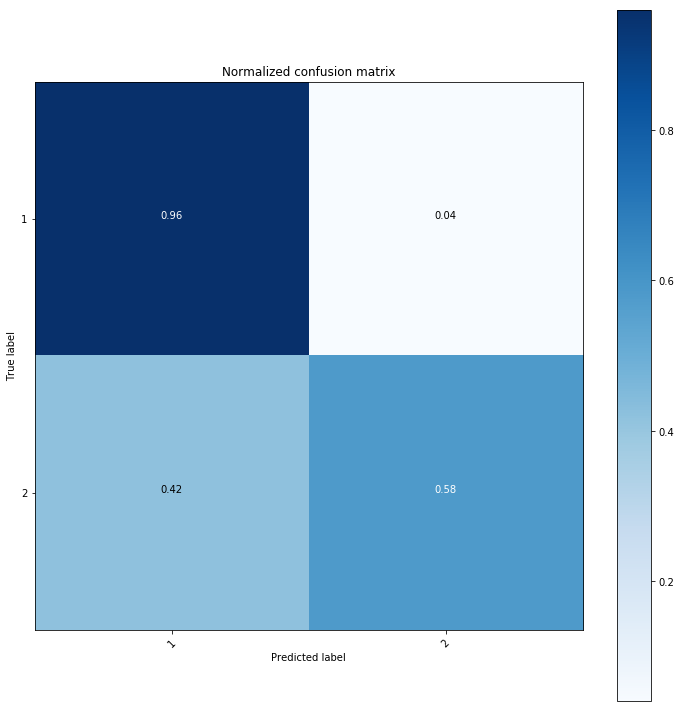

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.44it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94594595 0.05405405]
 [0.1827957  0.8172043 ]]


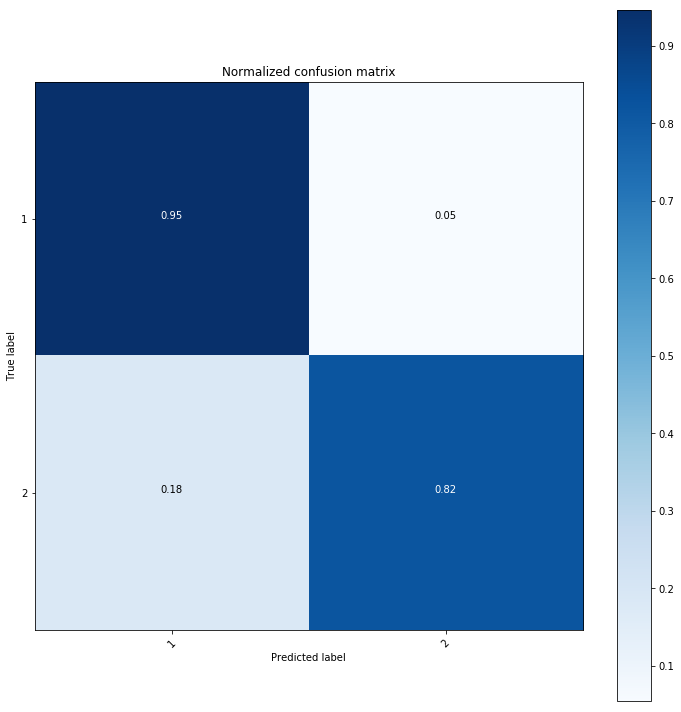

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.46it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.03225806 0.96774194]]


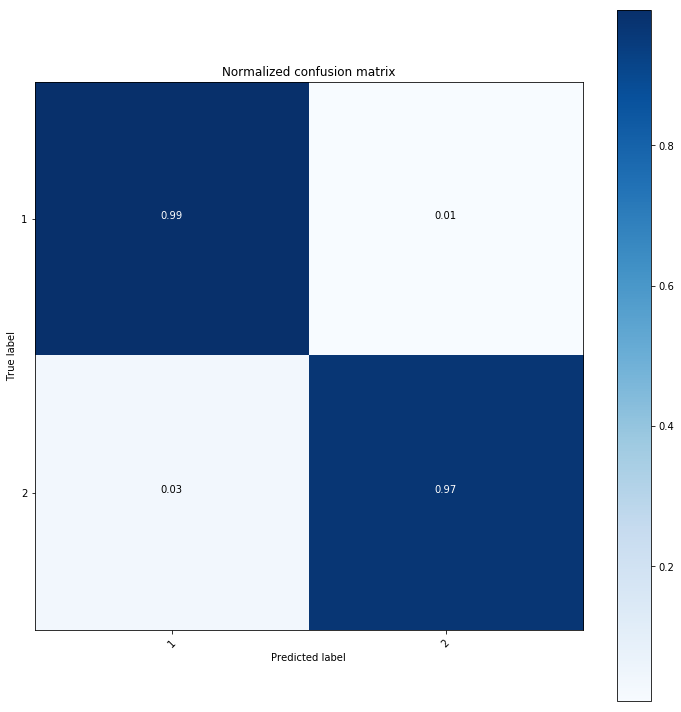

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[-0.6481027  -0.25491409 -0.68231539 ... -1.23220463 -1.3927682
   0.71769577]
 [-0.57696762 -0.25434264 -0.60611658 ... -0.42505467 -0.20362502
  -2.34743235]
 [-0.55802382 -0.25409205 -0.57902755 ...  1.41903751 -0.9705721
  -2.60642246]
 ...
 [-0.43289603 -0.24080239 -0.44471841 ... -0.31180589  0.74433252
  -2.53495381]
 [-0.34374839 -0.2320118  -0.31081706 ... -0.27626939 -0.92766839
  -1.64761082]
 [ 0.19450019 -0.23851696  0.00382345 ... -1.53088835  1.36801438
  -2.49449941]]


100%|██████████| 609/609 [00:48<00:00, 12.53it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:48<00:00, 12.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.66666667 0.33333333]]


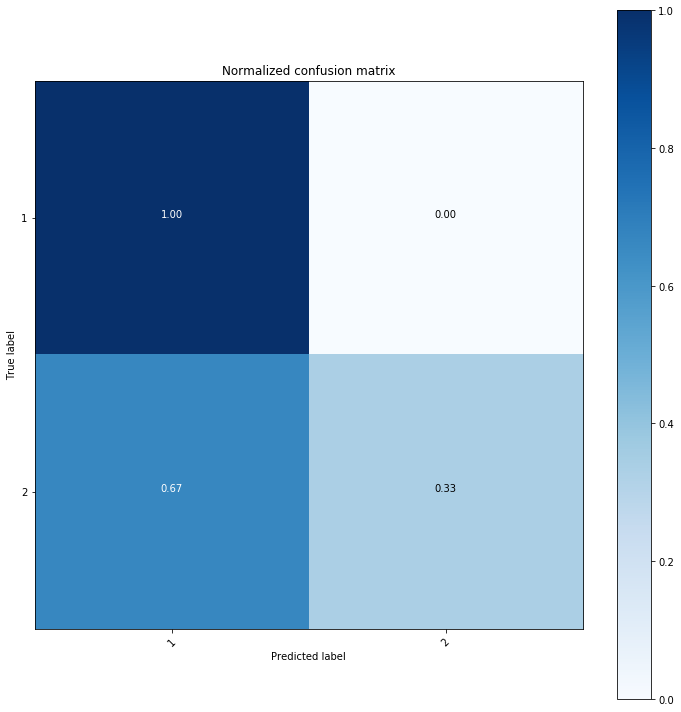

predicting 2 performance


100%|██████████| 609/609 [00:49<00:00, 12.39it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.22580645 0.77419355]]


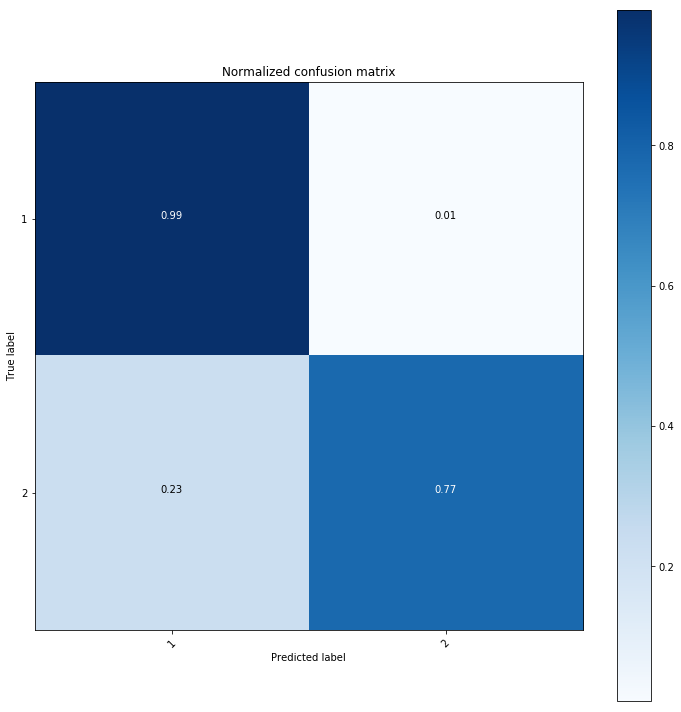

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.47it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


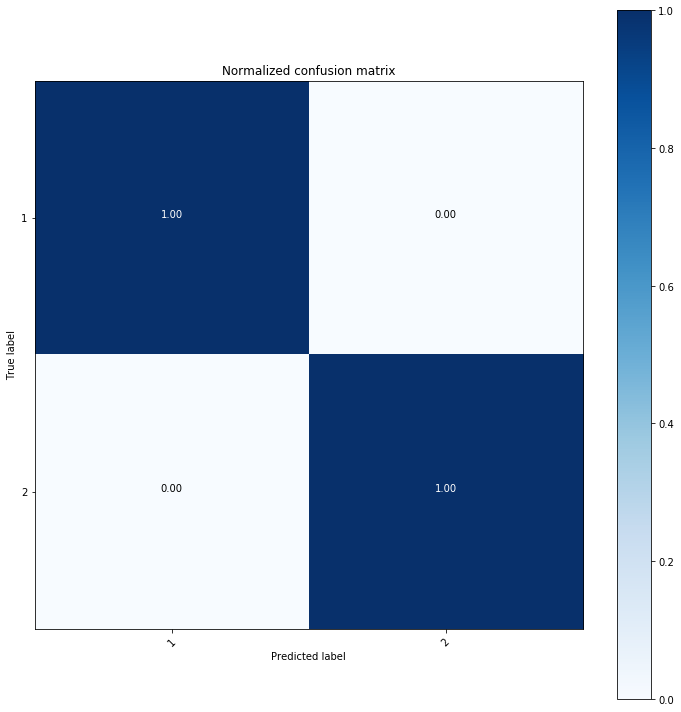

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[-1.56146348e-01 -4.36880274e-01 -2.60774605e-01 ... -4.34460787e-01
  -4.44580514e-03 -1.73480106e+00]
 [-1.42775960e-01 -4.36407746e-01 -2.43331129e-01 ... -8.97303525e-01
  -4.08793245e-02 -1.53246116e+00]
 [-5.62809721e-02 -4.32507243e-01 -1.48955342e-01 ... -1.09363139e+00
   2.30401553e-02 -4.06280713e-01]
 ...
 [ 2.44750612e-01 -4.27982178e-01 -2.52876800e-02 ... -1.48433133e+00
   1.59168710e+00 -2.21458709e+00]
 [ 8.99880988e-02 -4.35326283e-01 -1.08630394e-01 ...  4.82598817e-01
   1.07400534e+00  3.39774564e-01]
 [ 1.94773176e-01 -4.33485450e-01 -4.80095109e-04 ...  1.86342978e+00
   1.43801491e+00  9.72408783e-01]]


100%|██████████| 609/609 [00:49<00:00, 12.42it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:49<00:00, 12.43it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.92567568 0.07432432]
 [0.19354839 0.80645161]]


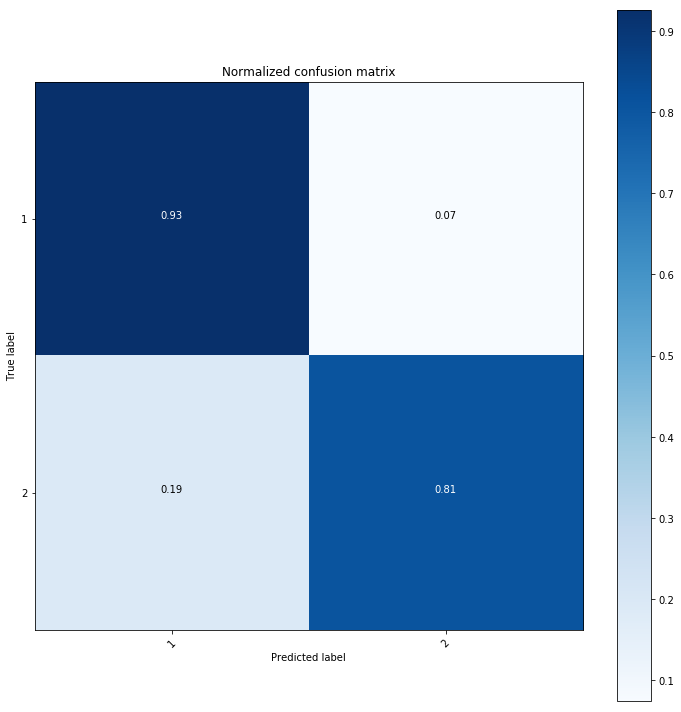

predicting 2 performance


100%|██████████| 609/609 [00:49<00:00, 12.42it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.89864865 0.10135135]
 [0.13978495 0.86021505]]


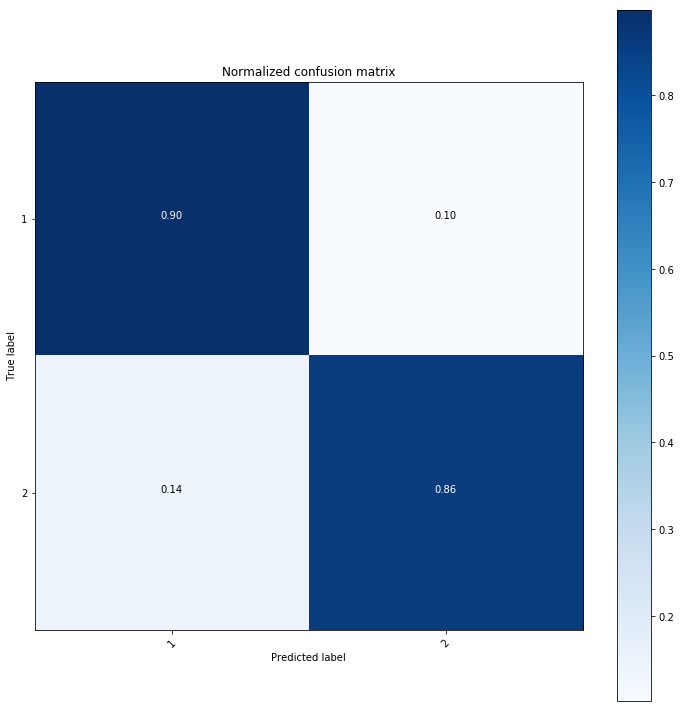

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.45it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.         1.        ]]


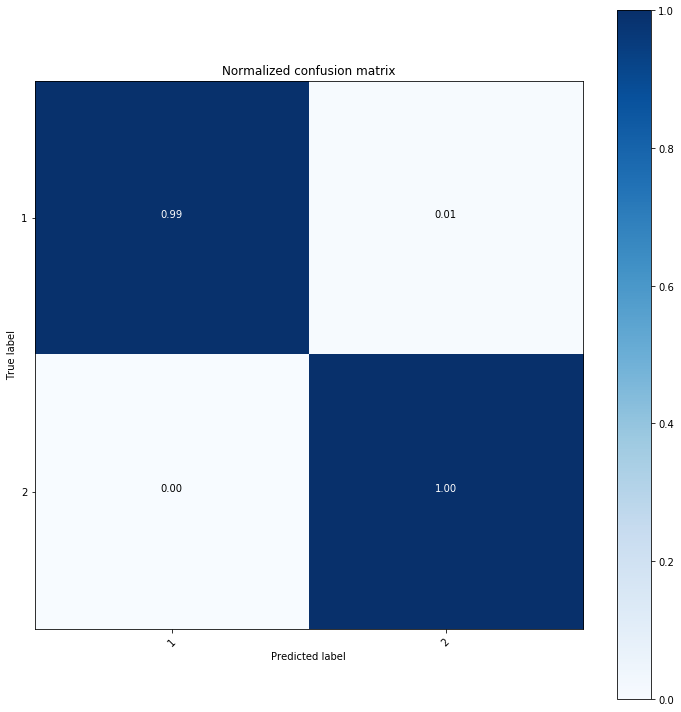

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-1.19908456 -0.4679546  -0.99753457 ... -0.93336668  0.0053597
  -1.91172275]
 [-1.23555406 -0.46859624 -1.03218256 ... -0.77069869  0.84797125
  -0.6620936 ]
 [-1.2642945  -0.46790729 -1.06736087 ... -1.5404124  -0.0674702
  -0.81749903]
 ...
 [-1.64419554 -0.46878591 -1.50541039 ... -0.83202786 -0.70357797
  -1.59756504]
 [-1.62024239 -0.46872192 -1.49592344 ... -0.14535837  0.49715178
  -0.85846079]
 [-1.60146682 -0.46882732 -1.49612968 ... -1.07139109  0.52531516
  -1.82711925]]


100%|██████████| 609/609 [00:47<00:00, 12.69it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 609/609 [00:48<00:00, 12.66it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91216216 0.08783784]
 [0.13978495 0.86021505]]


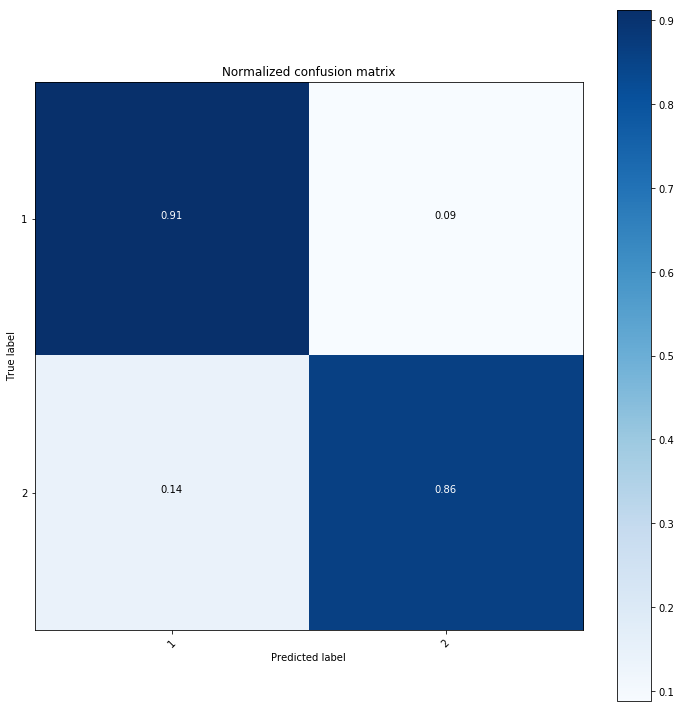

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.66it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.89189189 0.10810811]
 [0.17204301 0.82795699]]


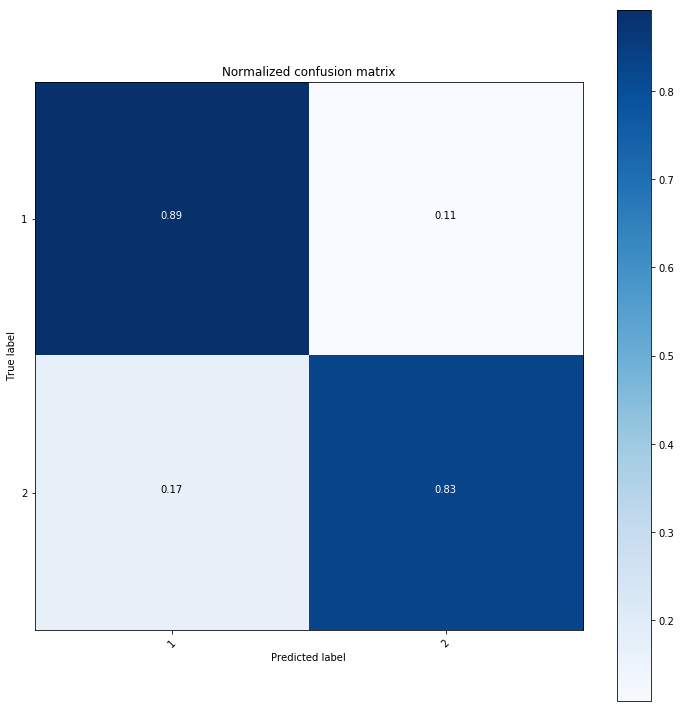

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


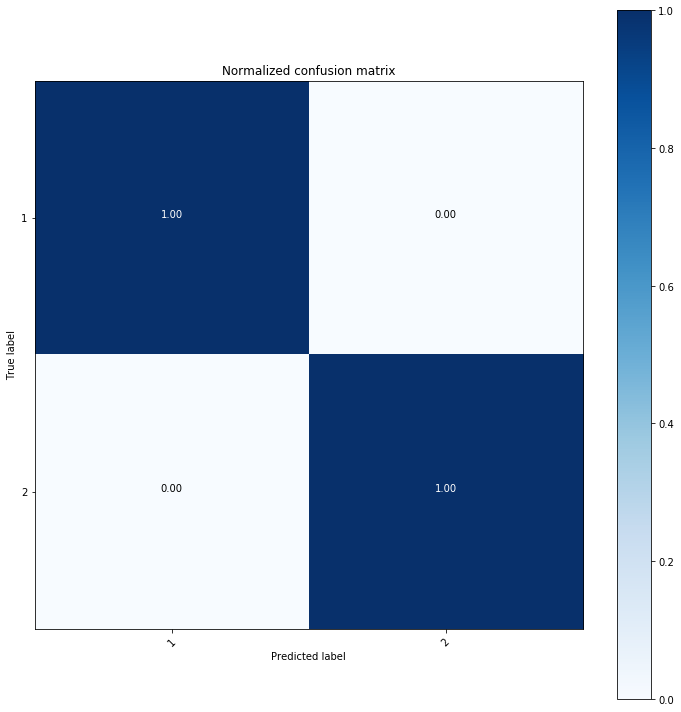

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[ 0.56997451 -0.48936338  0.48412545 ... -1.40607613  0.96192329
  -0.84534704]
 [ 0.47931208 -0.68639484  0.44052987 ...  0.06812633  0.86323907
  -1.63510644]
 [ 0.67156758 -0.72901995  0.56061803 ...  1.29004302 -1.2387688
  -1.73299626]
 ...
 [ 2.44638609  0.04366484  3.12601781 ... -0.72131937  0.85645188
   0.17596038]
 [ 3.08380419 -0.4777604   4.15377388 ...  1.32989975  1.21110504
   0.80269358]
 [ 3.27503628 -0.18504069  4.32713505 ...  1.1928406   0.80684833
  -0.16246252]]


100%|██████████| 609/609 [00:48<00:00, 12.56it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:48<00:00, 12.66it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.86486486 0.13513514]
 [0.05376344 0.94623656]]


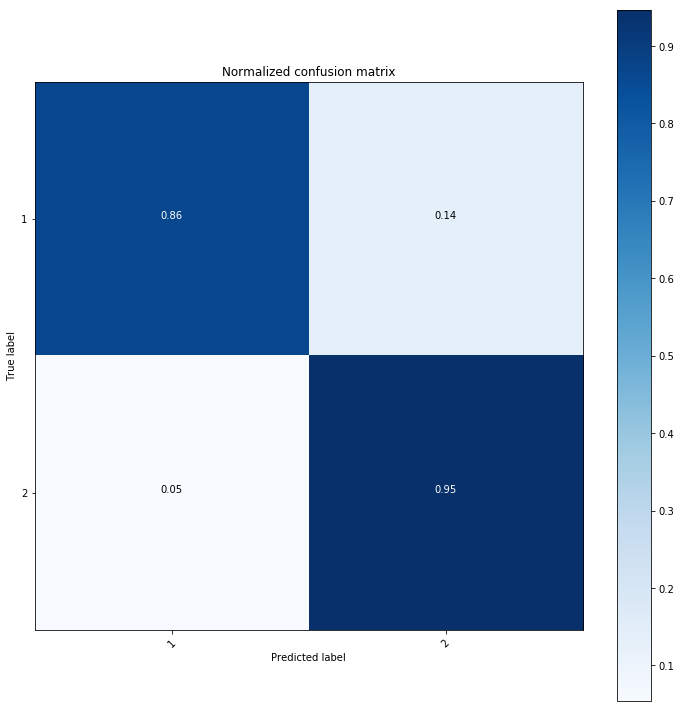

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.93243243 0.06756757]
 [0.03225806 0.96774194]]


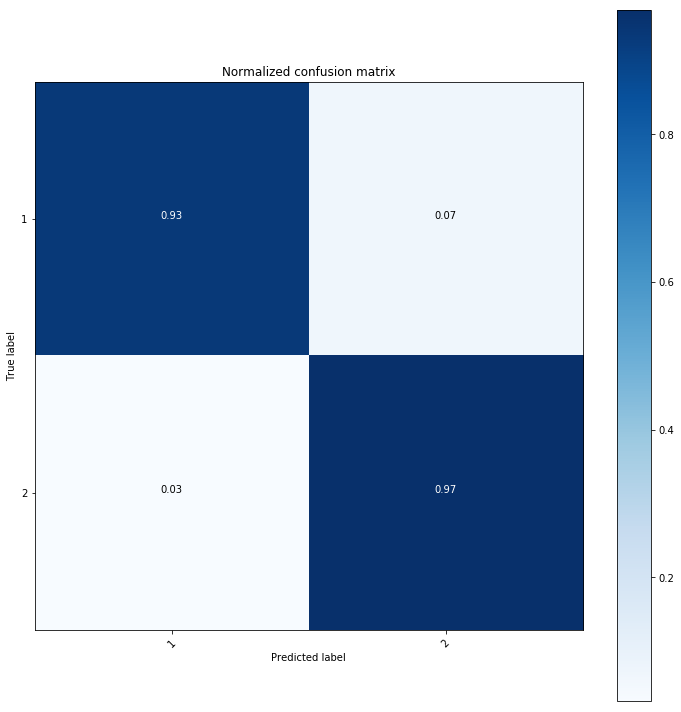

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.01075269 0.98924731]]


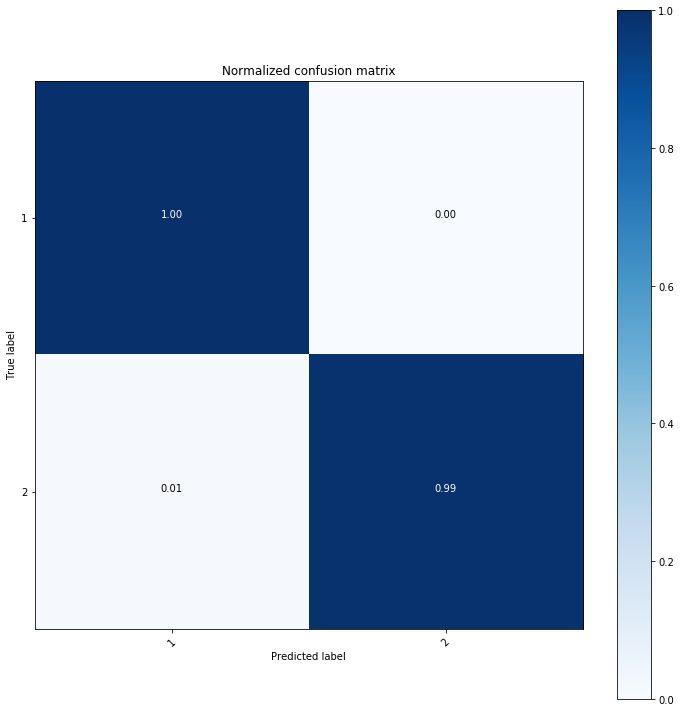

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[ 0.48815957  0.10526108  0.4859849  ...  1.66118302  1.16160975
   0.51761817]
 [ 1.38018754  1.4472864   1.50065659 ...  0.7705793  -0.27926787
  -3.14623057]
 [ 0.63612317  0.23932048  0.65780264 ...  0.85272975  1.66466789
  -1.01014113]
 ...
 [ 2.10813056 -0.34067238  2.45757004 ...  1.28500282  0.61160143
  -0.13383223]
 [ 1.99430187 -0.35617346  2.33632978 ...  0.87276716 -1.43730346
  -1.41060469]
 [ 1.81658806 -0.41029145  2.14432268 ...  0.35883412 -0.58465967
  -1.51094011]]


100%|██████████| 609/609 [00:48<00:00, 12.66it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:48<00:00, 12.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.55405405 0.44594595]
 [0.98924731 0.01075269]]


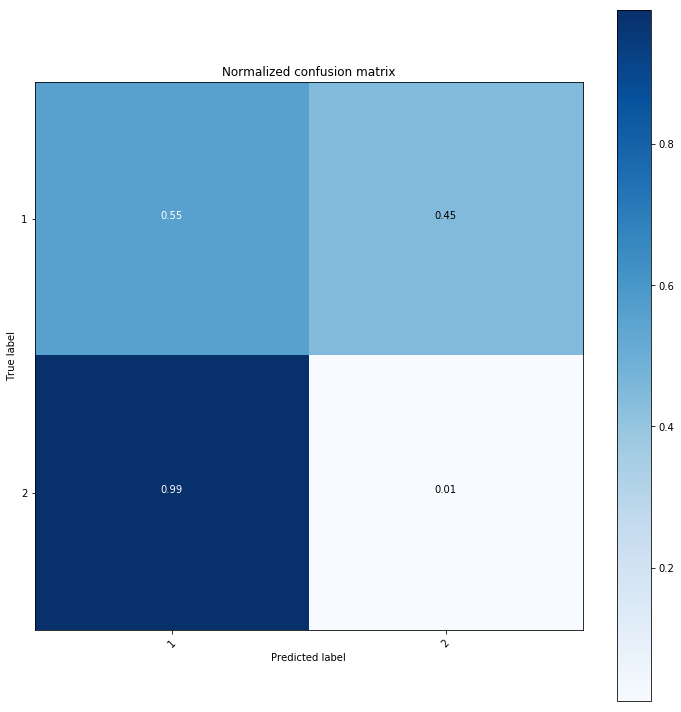

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.61it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.58108108 0.41891892]
 [0.94623656 0.05376344]]


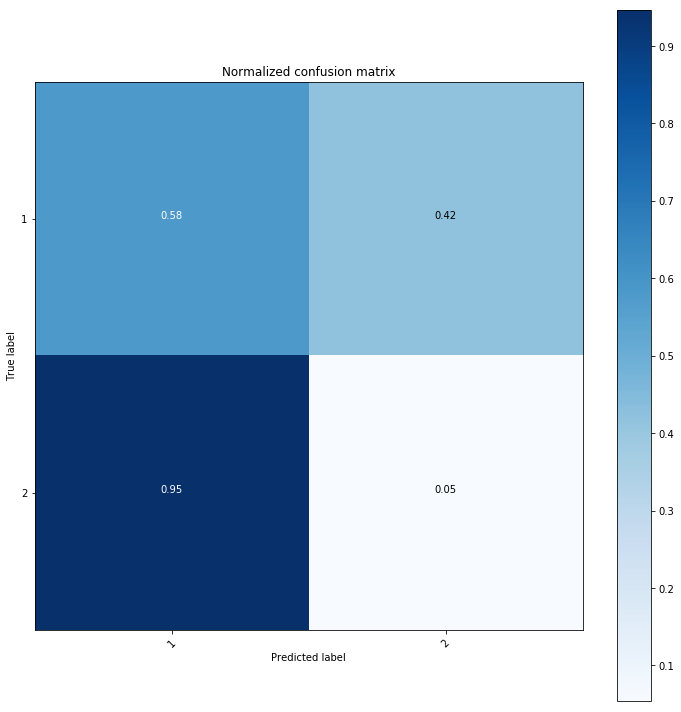

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.63it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98648649 0.01351351]
 [0.11827957 0.88172043]]


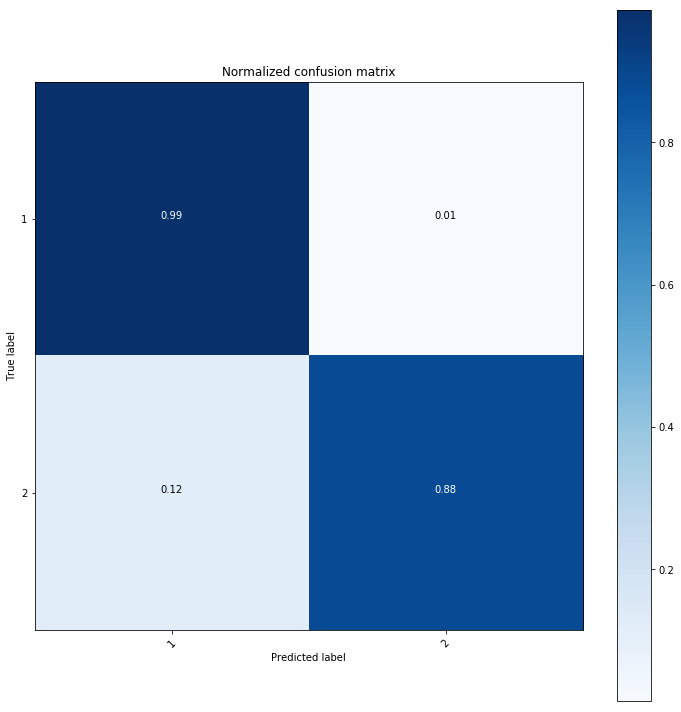

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[-0.06194498 -0.42240336  0.04497304 ... -0.62827884 -1.21030339
  -0.89663481]
 [-0.09364715 -0.42365091  0.00773571 ... -1.23608839 -2.07313574
   1.13847209]
 [-0.17344262 -0.4169067  -0.09493411 ...  2.07598363 -2.0317442
  -2.39374454]
 ...
 [ 0.26754708 -0.40011514  0.35196085 ... -1.47164571 -1.27312848
   0.52332438]
 [ 0.2965638  -0.41405283  0.38134205 ...  1.73715504  0.68858215
  -0.69679762]
 [ 0.30661882 -0.41982563  0.38994582 ... -0.12380962 -0.38412541
   0.35718604]]


100%|██████████| 609/609 [00:48<00:00, 12.62it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:48<00:00, 12.61it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.27702703 0.72297297]
 [0.10752688 0.89247312]]


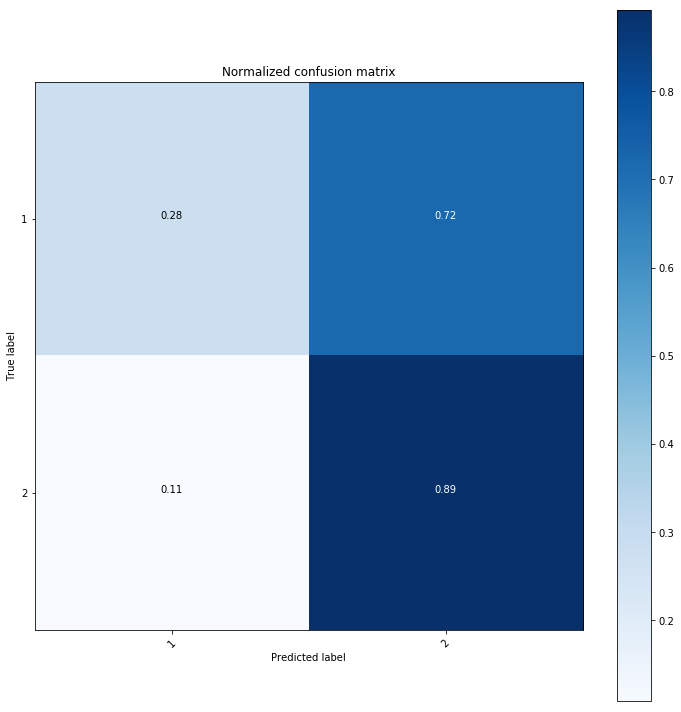

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.02027027 0.97972973]
 [0.02150538 0.97849462]]


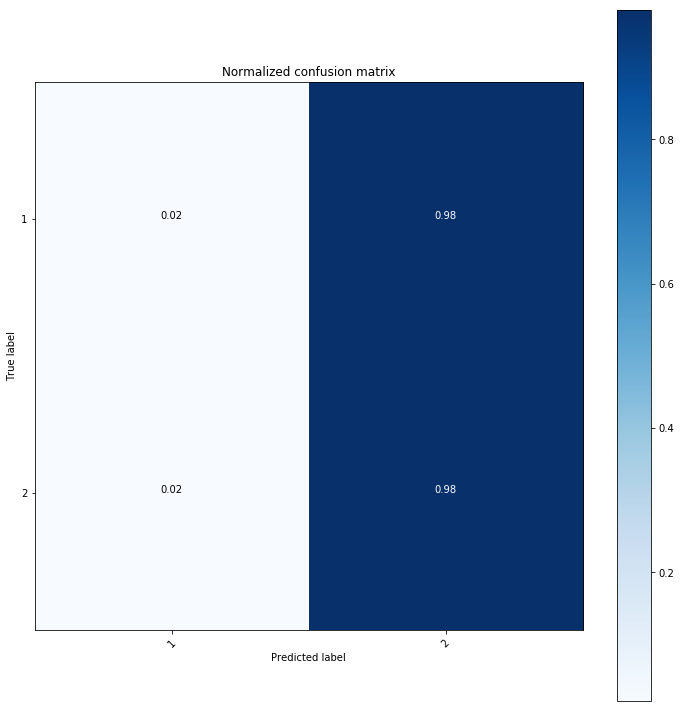

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.61it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


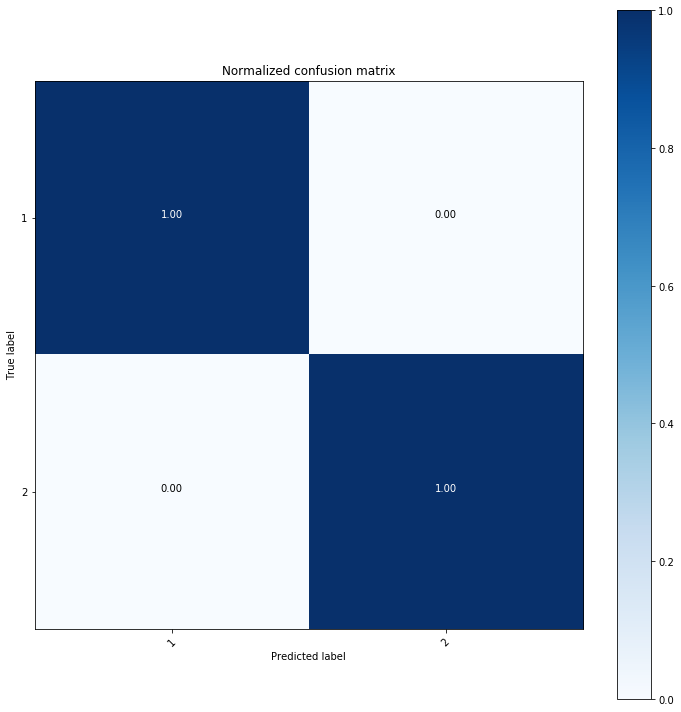

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[ 2.07588581 -0.30627264  1.99185159 ...  0.47393305 -0.84324956
  -0.85191941]
 [ 2.14621689 -0.30389609  2.04665251 ...  0.86029022 -1.02514168
  -0.56693851]
 [ 2.13426359 -0.31332253  2.01625368 ...  0.69886716  0.07373639
  -1.75457867]
 ...
 [ 0.10820102 -0.30587624 -0.11240216 ... -0.4414017  -0.89158531
   0.54260195]
 [ 0.08259679 -0.30753736 -0.15085301 ... -0.4007507  -0.72418383
  -0.07589986]
 [ 0.22147525 -0.29221846  0.00778292 ... -0.43405245  0.04601558
  -1.04047777]]


100%|██████████| 609/609 [00:48<00:00, 12.61it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 609/609 [00:48<00:00, 12.65it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97972973 0.02027027]
 [0.82795699 0.17204301]]


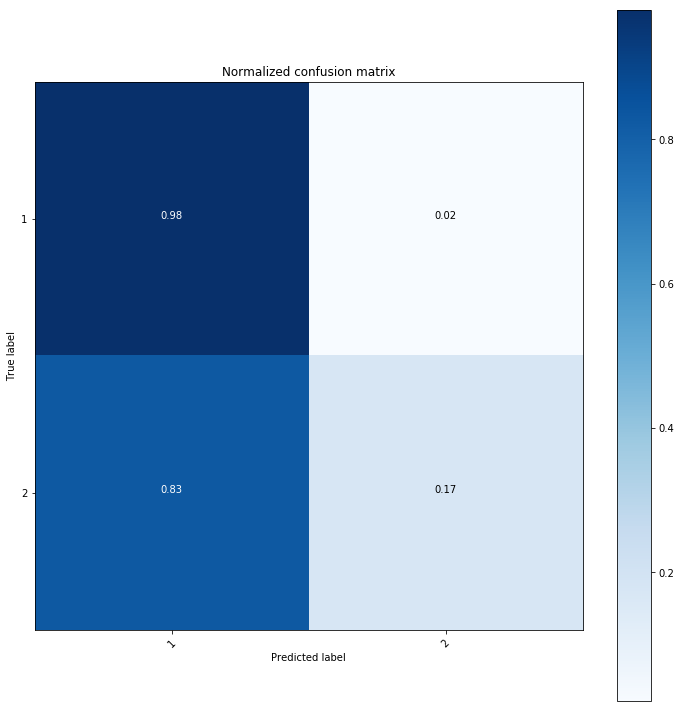

predicting 2 performance


100%|██████████| 609/609 [00:48<00:00, 12.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98648649 0.01351351]
 [0.62365591 0.37634409]]


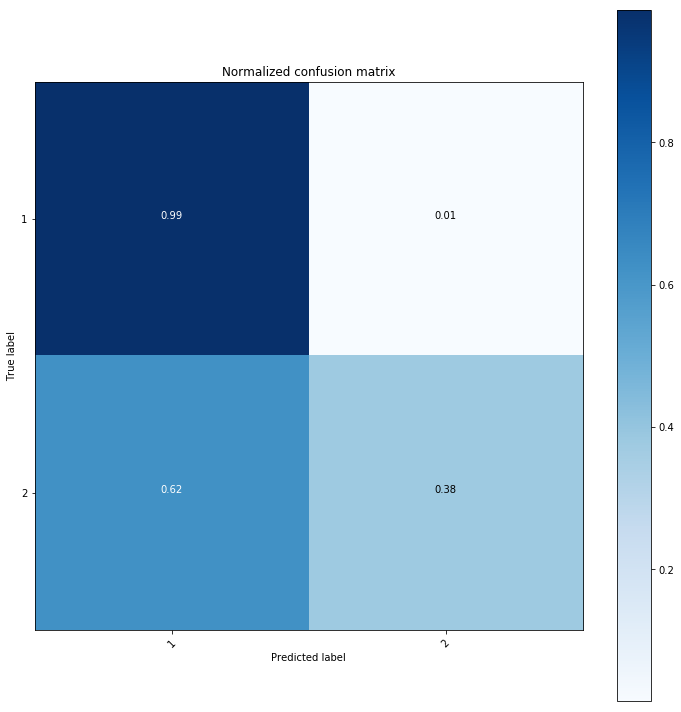

predicting 3 performance


100%|██████████| 609/609 [00:48<00:00, 12.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96621622 0.03378378]
 [0.03225806 0.96774194]]


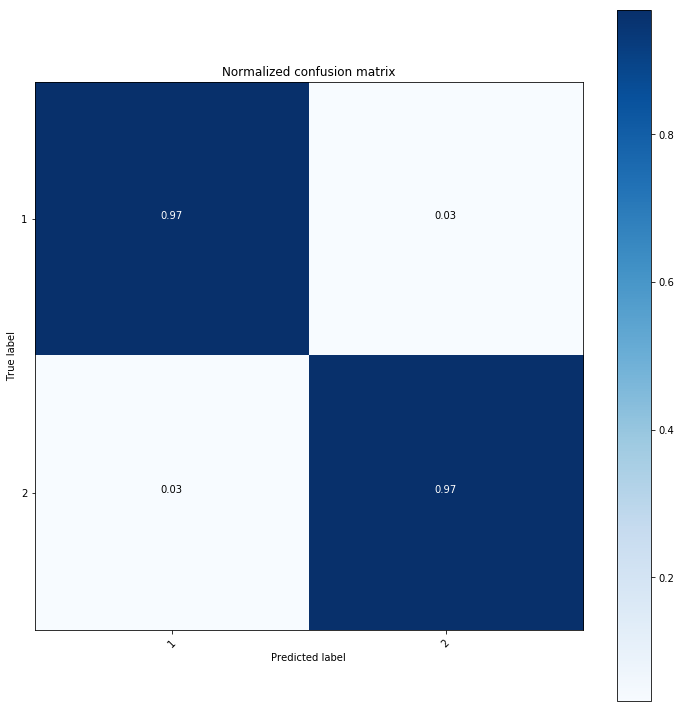

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)